In [1]:
%load_ext autoreload
%autoreload 2
import os 
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
data = pd.read_csv("data.csv", encoding="latin1")  # use latin-1 because CSV file was saved in another encoding
data
df_old=pd.DataFrame(data) # original set
x=np.array(df_old[['Date']]).reshape(-1,1)
y=np.array(df_old[['Time']])
k = (2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030)

In [3]:
reg = LinearRegression()
reg
reg.fit(x,y)

LinearRegression()

In [4]:
x_test=np.array(k).reshape(-1,1)

In [5]:
predicted_time = reg.predict(x_test)
n = list(range(1,33))
df_predicted=pd.DataFrame({'Time': [9.62009798, 9.61334879, 9.60045825, 9.60000451, 9.58919453, 9.57677349, 9.56643245, 9.56243001], 
                           'Date' : k})
df_pred = pd.concat([df_old, df_predicted])
df_pred.index = [n]
print(df_pred)


         Time         Athlete   Nationality            Location of Race   Date
1   10.060000       Bob Hayes  United States                Tokyo, Japan  1964
2   10.030000       Jim Hines  United States             Sacramento, USA  1968
3   10.020000  Charles Greene  United States         Mexico City, Mexico  1968
4    9.950000       Jim Hines  United States         Mexico City, Mexico  1968
5    9.930000    Calvin Smith  United States       Colorado Springs, USA  1983
6    9.830000    Ben Johnson          Canada                 Rome, Italy  1987
7    9.930000      Carl Lewis  United States                 Rome, Italy  1987
8    9.930000      Carl Lewis  United States         Zrich, Switzerland  1988
9    9.790000    Ben Johnson          Canada          Seoul, South Korea  1988
10   9.920000      Carl Lewis  United States          Seoul, South Korea  1988
11   9.900000   Leroy Burrell  United States               New York, USA  1991
12   9.860000      Carl Lewis  United States        

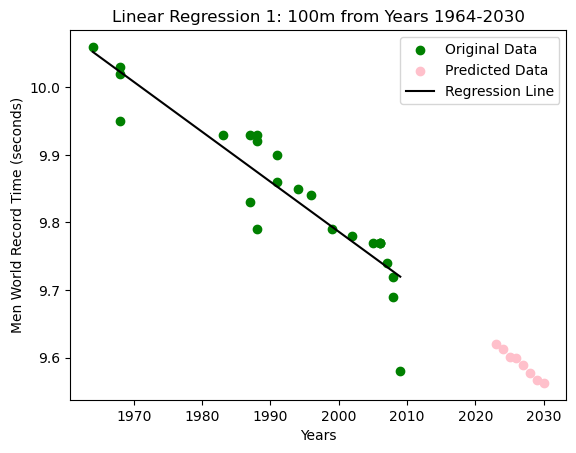

In [6]:
plt.title('Linear Regression 1: 100m from Years 1964-2030')
plt.scatter(x, y, color='green', label="Original Data")
plt.scatter(df_predicted['Date'], df_predicted['Time'], color='pink', label="Predicted Data")
m, b = np.polyfit(df_pred['Date'], df_pred['Time'],1)
plt.plot(x, m*x+b, color='black', label="Regression Line")
plt.xlabel('Years')
plt.ylabel('Men World Record Time (seconds)')
plt.legend(loc=1) # putting legend in the upper right corner
plt.show()

In [7]:
reg.coef_
reg.intercept_
reg.score(x,y)
print("Beta 0 (constants) = ", reg.intercept_, ", Beta 1 (coefficient) = ", reg.coef_, ", R-Squared =", reg.score(x,y))

Beta 0 (constants) =  [24.64808957] , Beta 1 (coefficient) =  [[-0.00743113]] , R-Squared = 0.8364108726448355


In [8]:
# let's see how the data changes without an outlier: 
df_new = df_old.drop(23) # dropping an outlier from Data 1
x_new = np.array(df_new[['Date']]).reshape(-1,1)
y_new = df_new['Time']
reg_new = LinearRegression()
reg_new
reg_new.fit(x_new, y_new)

LinearRegression()

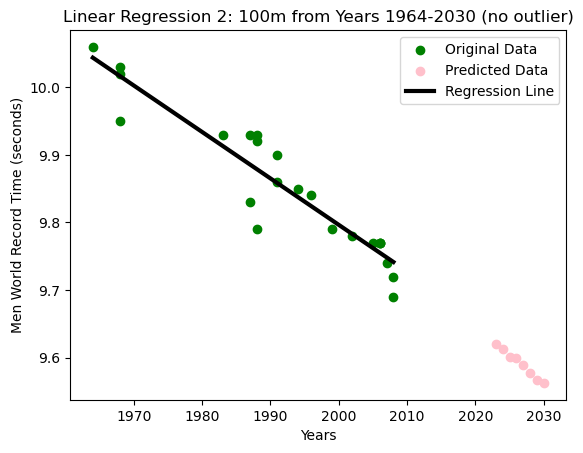

In [9]:
# New plot without an outlier: 
plt.title('Linear Regression 2: 100m from Years 1964-2030 (no outlier)')
plt.scatter(df_new['Date'], df_new['Time'], color = 'green', label = "Original Data")
plt.scatter(df_predicted['Date'], df_predicted['Time'], color='pink', label = "Predicted Data")
m_new, b_new = np.polyfit(df_new['Date'], df_new['Time'],1)
plt.plot(x_new, m_new*x_new + b_new, color = 'black', linewidth = 3, label = "Regression Line")
plt.legend(loc=1) # Putting legend the upper right corner 
plt.xlabel('Years')
plt.ylabel('Men World Record Time (seconds)')
plt.show()

In [10]:
reg_new.coef_
reg_new.intercept_
reg_new.score(x_new, y_new)
print("Beta 0 (constants) = ", reg_new.intercept_, ", Beta 1 (coefficient) = ", reg_new.coef_, ", R-Squared =", reg_new.score(x_new,y_new))

Beta 0 (constants) =  23.551246054891937 , Beta 1 (coefficient) =  [-0.00687737] , R-Squared = 0.8778574177629347


In [11]:
# OLS Regression results with outlier 
x = sm.add_constant(x)
model_original = sm.OLS(y,x)
results_original = model_original.fit()
print(results_original.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     112.5
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           4.10e-10
Time:                        10:53:23   Log-Likelihood:                 39.999
No. Observations:                  24   AIC:                            -76.00
Df Residuals:                      22   BIC:                            -73.64
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.6481      1.396     17.656      0.0

In [12]:
# OLS Regression results without the outlier: 
x_new = sm.add_constant(x_new)
model_new = sm.OLS(y_new,x_new)
results_new = model_new.fit()
print(results_new.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     150.9
Date:                Sat, 04 Oct 2025   Prob (F-statistic):           4.71e-11
Time:                        10:53:23   Log-Likelihood:                 44.278
No. Observations:                  23   AIC:                            -84.56
Df Residuals:                      21   BIC:                            -82.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5512      1.115     21.123      0.0